## Trabalho de Microeconomia
Otimizar lucro no leilão selado de primeiro preço

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import palettable
import matplotlib.pyplot as plt
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [2]:
# Show all Columns and Rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 10)

# Style Adjustments
import matplotlib.style
import matplotlib as mpl
for m,n in zip(['grid.color','axes.titlecolor','axes.labelcolor','xtick.color','ytick.color','axes.titlesize',
    'figure.figsize','legend.framealpha'],['white','white','white','white','white','20.0','13.0, 8.0','0.8']):
    mpl.rcParams[m] = n

cmap = palettable.scientific.sequential.LaJolla_5.hex_colors

In [3]:
custos = pd.read_excel('/Users/pedrocerbino/Downloads/custos_g7.xlsx',index_col=0)

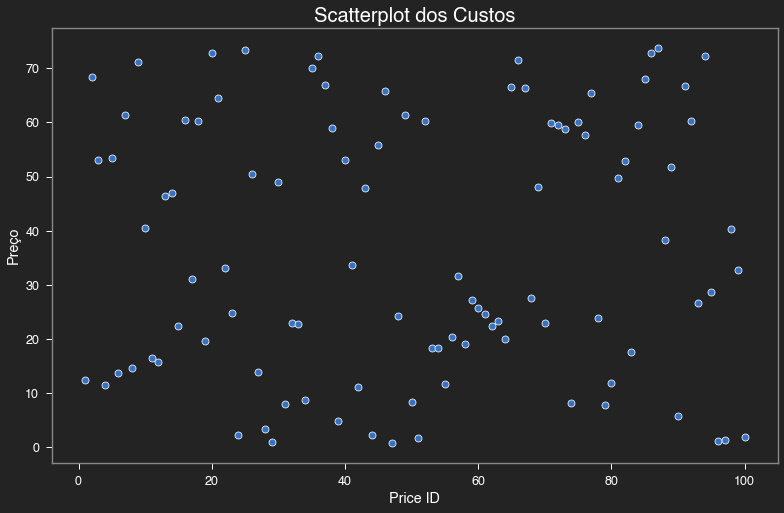

In [4]:
sns.scatterplot(x=list(range(1,101)),y=custos.custos.values)
plt.title('Scatterplot dos Custos')
plt.xlabel('Price ID')
plt.ylabel('Preço');

In [5]:
custos.describe()

,custos
count,100.000000
mean,36.717000
std,23.802101
min,0.800000
25%,16.300000
50%,32.250000
75%,59.950000
max,73.800000


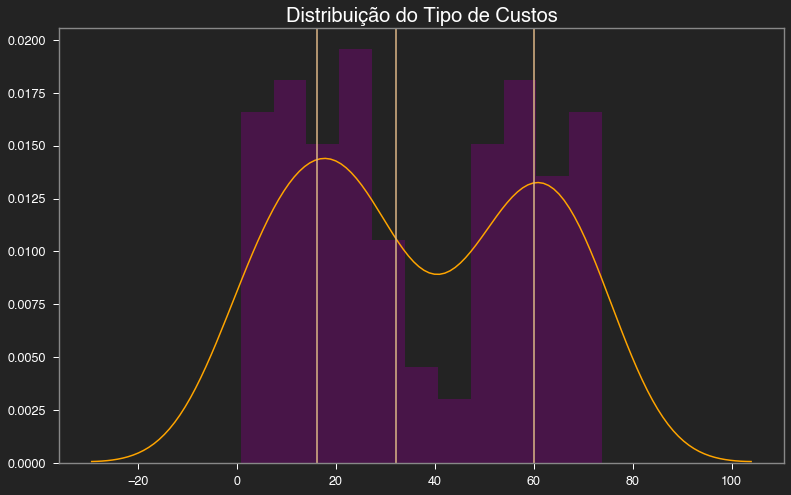

In [6]:
sns.distplot(custos, bins=11, color='purple', kde_kws={"color":"orange"})
quantile = np.quantile(custos,[0.25,0.5,0.75])
plt.axvline(x=quantile[0],color='burlywood')
plt.axvline(x=quantile[1],color='burlywood')
plt.axvline(x=quantile[2],color='burlywood')
plt.xlabel('')
plt.title('Distribuição do Tipo de Custos');

In [7]:
import warnings
import scipy.stats as st

# Create models from data
def best_fit_distribution(DISTRIBUTIONS, data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf
    
    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse
                    print(best_distribution.name)

        except Exception:
            pass

    return (best_distribution.name, best_params)

In [8]:
def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

alpha
anglit
arcsine
beta
bradford
burr
dweibull
genpareto
johnsonsb


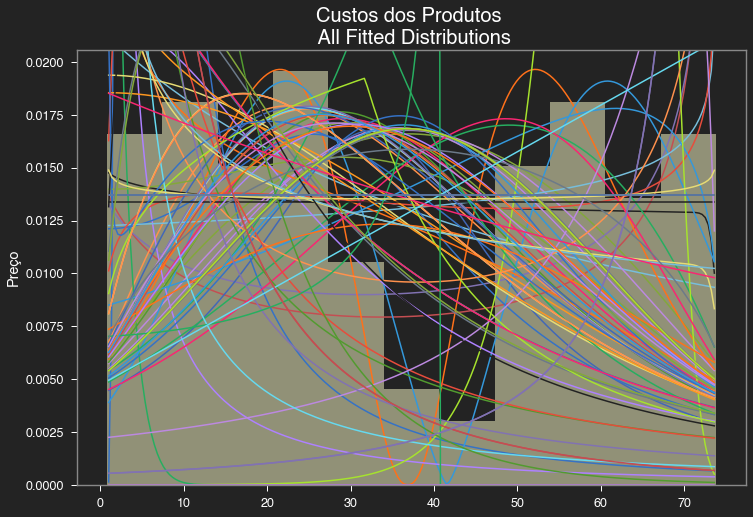

In [9]:
# Get data and palette
data = custos.custos
cmap = palettable.scientific.sequential.LaJolla_20.hex_colors

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=11, density=True, alpha=0.5, color=cmap)
# Save plot limits
dataYLim = ax.get_ylim()

# Distributions to check
DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(DISTRIBUTIONS, data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'Custos dos Produtos \n All Fitted Distributions')
ax.set_ylabel('Frequencia')
ax.set_ylabel('Preço');

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

[distfit] >fit..
[distfit] >transform..
[smoothline] >Smoothing by interpolation..
[distfit] >[norm      ] [RSS: 0.0021233] [loc=36.717 scale=23.683] 
[distfit] >[expon     ] [RSS: 0.0028129] [loc=0.800 scale=35.917] 
[distfit] >[pareto    ] [RSS: 0.0189228] [loc=-1.841 scale=2.641] 
[distfit] >[dweibull  ] [RSS: 0.0004571] [loc=41.568 scale=24.705] 
[distfit] >[t         ] [RSS: 0.0021234] [loc=36.719 scale=23.682] 
[distfit] >[genextreme] [RSS: 0.0020300] [loc=31.641 scale=26.396] 
[distfit] >[gamma     ] [RSS: 0.0021089] [loc=-564.796 scale=0.930] 
[distfit] >[lognorm   ] [RSS: 0.0242632] [loc=0.800 scale=1.513] 
[distfit] >[beta      ] [RSS: 0.0017782] [loc=-6.337 scale=80.137] 
[distfit] >[uniform   ] [RSS: 0.0009153] [loc=0.800 scale=73.000] 
[distfit] >Compute confidence interval [parametric]
{'distr': <scipy.stats._continuous_distns.dweibull_gen object at 0x7fc1f5a57810>, 'params': (2.289766082144454, 41.567993966684035, 24.70544457263186), 'name': 'dweibull', 'RSS': 0.00045706

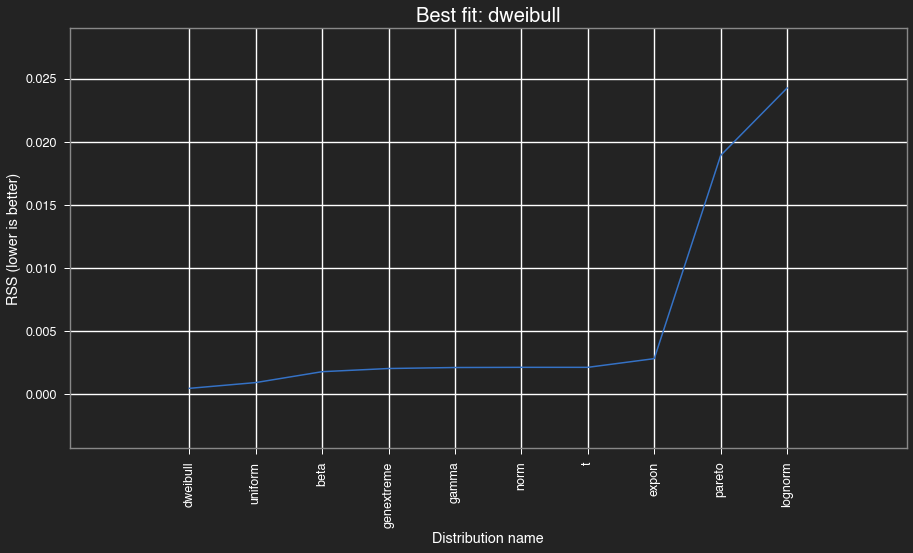

In [10]:
# Get values
X = custos.custos.values

# Retrieve P-value for y
y = [0,10,45,55,100]

# From the distfit library import the class distfit
from distfit import distfit

# Initialize.
# Set any properties here, such as alpha.
# The smoothing can be of use when working with integers. Otherwise your histogram
# may be jumping up-and-down, and getting the correct fit may be harder.
dist = distfit(alpha=0.05, smooth=10)

# Search for best theoretical fit on your empirical data
dist.fit_transform(X)

# Best fitted model
best_distr = dist.model
print(best_distr)

# Ranking distributions
dist.summary

# Plot the summary of fitted distributions
dist.plot_summary();

In [11]:
# Plot just for Weibull
DISTRIBUTIONS = [st.dweibull]

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(DISTRIBUTIONS, data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

dweibull


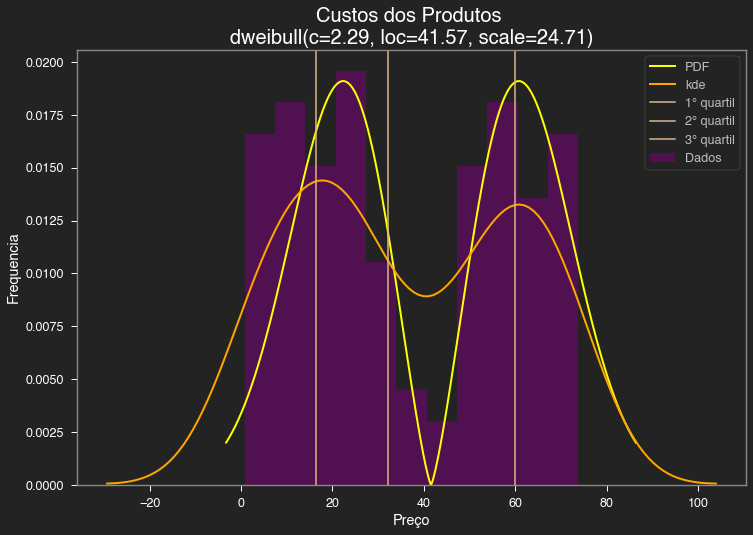

In [12]:
# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True, color='yellow')
data.plot(kind='hist', bins=11, density=True, alpha=0.5, label='Dados', legend=True, ax=ax, color='purple')

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'Custos dos Produtos \n' + dist_str)
ax.set_ylabel('Frequencia')

sns.distplot(custos.custos, kde_kws={"color":"orange",'lw':2}, hist=False, label='kde')
quantile = np.quantile(custos,[0.25,0.5,0.75])
for i in range(1,4):
    plt.axvline(x=quantile[i-1],color='burlywood',label=str(i)+'° quartil')
# quantile = np.quantile(custos,[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
# for i in range(1,10):
#     plt.axvline(x=quantile[i-1],color='burlywood',label=str(i)+'° quartil')
plt.legend()
plt.xlabel('Preço');

In [13]:
dist_str

'dweibull(c=2.29, loc=41.57, scale=24.71)'